Value iteration started...


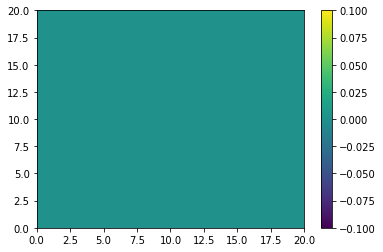

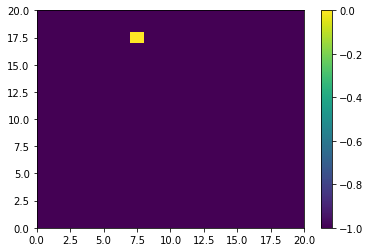

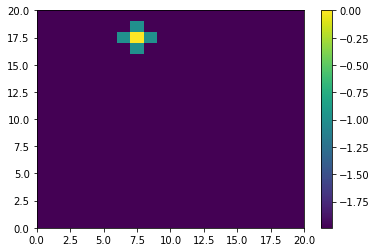

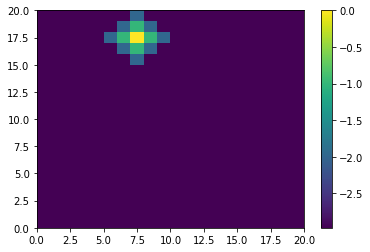

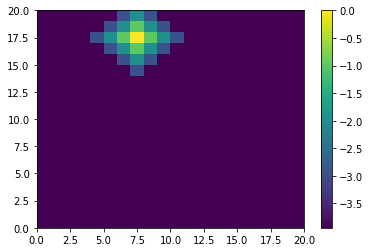

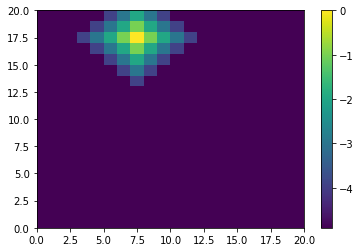

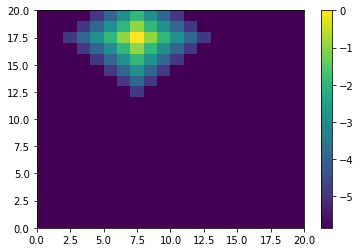

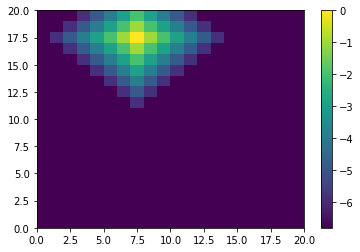

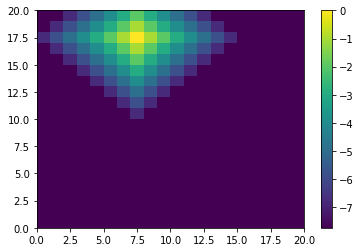

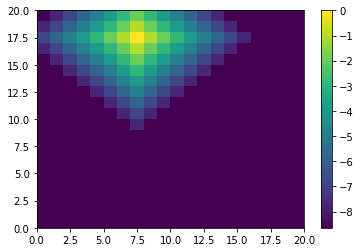

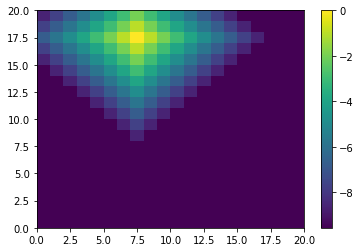

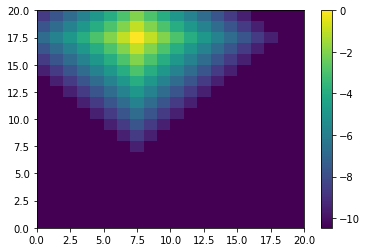

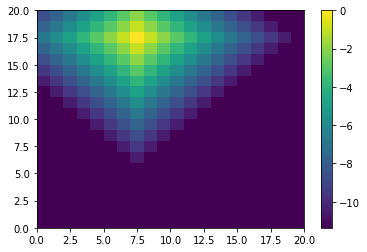

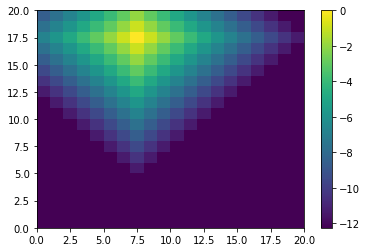

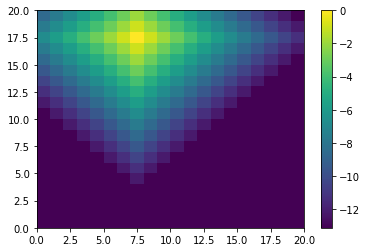

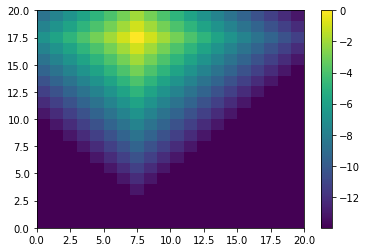

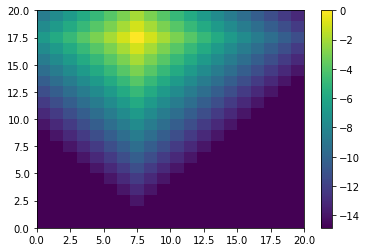

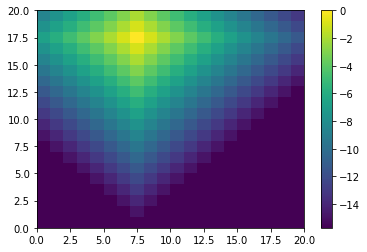

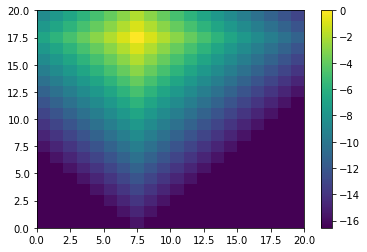

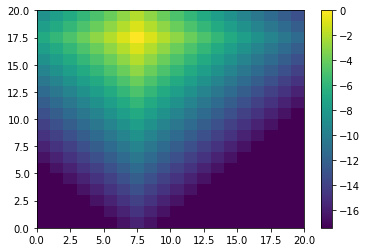

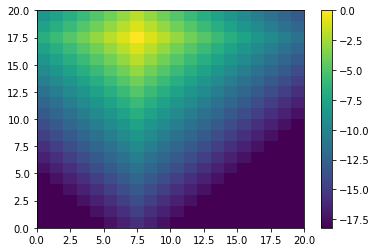

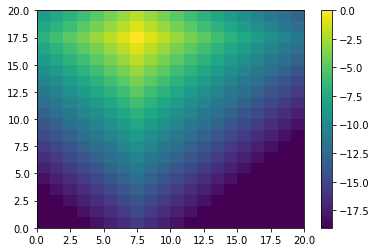

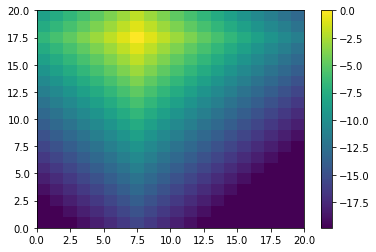

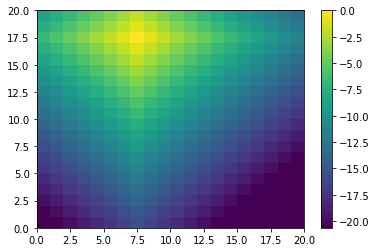

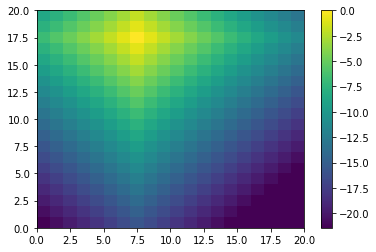

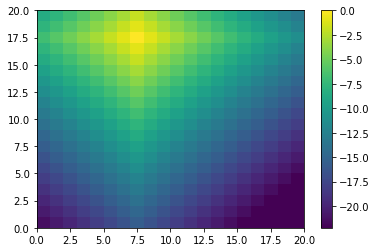

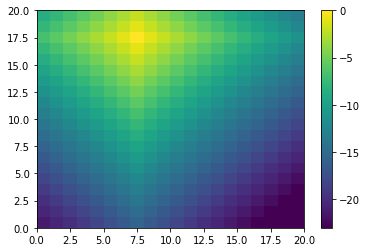

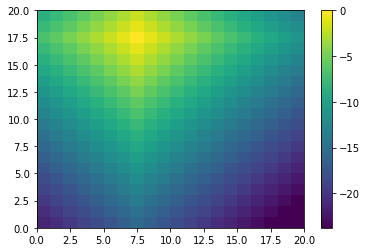

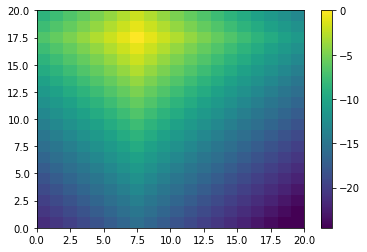

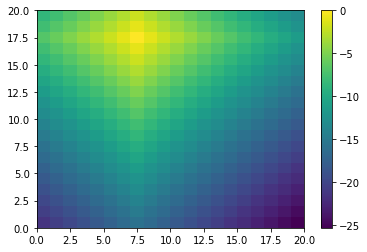

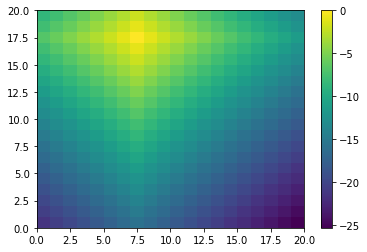

Value iteration finished!


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from myelin.dp import ValueIteration, ValueIterationCallback
from myelin.mdps import GridWorld


def display_value_function(vf):
    np.set_printoptions(precision=4, linewidth=200)
    plt.pcolormesh(vf)
    plt.colorbar()
    plt.show()


class Monitor(ValueIterationCallback):

    def on_learning_begin(self, data):
        print('Value iteration started...')
        display_value_function(data['vf'])

    def on_learning_end(self, data):
        print('Value iteration finished!')

    def on_iteration_end(self, data):
        display_value_function(data['vf'])


ROWS, COLS = 20, 20
value_iteration = ValueIteration(
    mdp=GridWorld(ROWS, COLS),
    theta=0.001,
    gamma=0.99,
    vfunction=np.zeros((ROWS, COLS)),
    callbacks=[Monitor()]
)
value_iteration.learn()